In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [10]:
data = pd.read_csv('dataset_var10_class.csv', header=None, sep=';')
data

,0,1,2,3,4,5,6,7
0,0.867769,0.273812,1.387896,-1.860588,-0.433173,-0.433173,0.809144,1
1,-0.559963,-0.030888,-0.218147,-0.427598,-0.520479,-0.520479,0.450213,2
2,0.532426,-0.170256,1.331985,-1.568242,-0.382907,-0.382907,1.060861,1
3,-1.408726,0.469138,-0.647103,0.842360,-0.262257,-0.262257,0.824288,2
4,1.617170,-0.160379,0.797986,-1.497035,-2.523307,-2.523307,2.012248,1
...,...,...,...,...,...,...,...,...
95,-0.704732,0.912002,-2.541651,0.980557,-2.061800,-2.061800,-0.162356,0
96,-1.422009,0.445203,-0.018297,1.384764,0.697850,0.697850,0.899067,0
97,0.114143,0.860798,0.028237,0.356873,NaN,-0.405343,0.598258,2
98,-1.505114,1.185235,3.934322,0.171666,2.518682,2.518682,3.679773,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
 3   3       100 non-null    float64
 4   4       95 non-null     float64
 5   5       100 non-null    float64
 6   6       95 non-null     float64
 7   7       100 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 6.4 KB
None
                0           1           2           3          4           5  \
count  100.000000  100.000000  100.000000  100.000000  95.000000  100.000000   
mean    -0.285374    0.121214    0.552983   -0.269108  -0.300937   -0.274006   
std      1.383135    0.940434    1.498921    1.616308   1.671857    1.700212   
min     -3.221204   -1.896674   -2.541651   -3.650972  -5.189785   -5.189785   
25%     -1.174968   -0.520582   -0.306968   -1.427509  -1.255152   -1.24

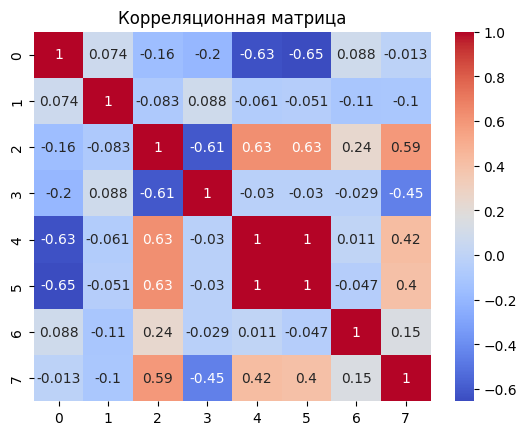

In [11]:
print(data.info())
print(data.describe())
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Корреляционная матрица")
plt.show()

In [12]:
print(data.isnull().sum())

imputer = SimpleImputer(strategy='mean')
data.iloc[:, :-1] = imputer.fit_transform(data.iloc[:, :-1])

0    0
1    0
2    0
3    0
4    5
5    0
6    5
7    0
dtype: int64


In [13]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=21)

In [15]:
models = {
    "LogisticRegression": (LogisticRegression(max_iter=1000), {}),
    "DecisionTree": (DecisionTreeClassifier(), {
        "max_depth": [3, 5, 10, None],
        "criterion": ["gini", "entropy"]
    }),
    "RandomForest": (RandomForestClassifier(), {
        "n_estimators": [50, 100],
        "max_depth": [None, 5, 10]
    }),
    "GradientBoosting": (GradientBoostingClassifier(), {
        "n_estimators": [50, 100],
        "learning_rate": [0.01, 0.1],
        "max_depth": [3, 5]
    }),
    "SVC": (SVC(), {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"]
    }),
    "KNN": (KNeighborsClassifier(), {
        "n_neighbors": [3, 5, 7]
    })
}

for name, (model, params) in models.items():
    print(f"\nОбработка модели: {name}")
    if params:
        clf = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
    else:
        clf = model
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

    if params:
        print(f"Лучшие параметры: {clf.best_params_}")


Обработка модели: LogisticRegression
LogisticRegression Accuracy: 0.8000
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.62      1.00      0.77         5
           2       1.00      0.43      0.60         7

    accuracy                           0.80        20
   macro avg       0.84      0.81      0.77        20
weighted avg       0.86      0.80      0.78        20


Обработка модели: DecisionTree
DecisionTree Accuracy: 0.8000
              precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       0.80      0.80      0.80         5
           2       1.00      0.57      0.73         7

    accuracy                           0.80        20
   macro avg       0.84      0.79      0.79        20
weighted avg       0.84      0.80      0.79        20

Лучшие параметры: {'criterion': 'gini', 'max_depth': 3}

Обработка модели: RandomForest
RandomForest A